<a href="https://colab.research.google.com/github/KOCORA/The-architecture-of-artificial-intelligence-systems./blob/master/Costumer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **BUILDING A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN** 

### **ПОСТРОЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ (CUSTOMER CHURN)**

### **CONSTRUCTION D'UN MODELE DE MACHINE LEARNING POUR PREDIRE LE DESABONNEMENT DES CLIENS D'UNE ENTREPRISE (CUSTOMER CHURN)**

Customer churn (This is customer churn in a business, supermarket or store.)

Customer churn occurs when a customer decides to stop using a company's services, content or products. There are many examples and instances of churn:

* Cancellation of a contracted or uncontracted service;
* Purchase from another competing store;
* Unsubscribing from a newsletter;
* Closing a bank account;
* Etc...

In this business world where a company faces many competitors, the cost of acquiring new customers is very high. Therefore, the retention of existing customers is more important for companies. Therefore, the company must better understand the behavior of its customers in order to retain them. One way to do this is to create a Machine Learning or artificial neural network model that can predict which customers are likely to churn. This allows the company to better target and retain those specific customers who are at a higher risk of churn.

In this project, we will explore a dataset from a telecommunications company and create a model to predict which customers are at higher risk of churn. We will use different Machine Learning algorithms to compare their performance and then choose the best model.

*************

Customer churn (Это отток клиентов в бизнесе, супермаркете или магазине).

Отток клиентов происходит, когда клиент решает прекратить пользоваться услугами, контентом или продуктами компании. Существует множество примеров и случаев оттока:

* Отказ от услуг по контракту или без него;
* Покупка в магазине другого конкурента;
* Отказ от подписки на рассылку новостей;
* Закрытие банковского счета;
* и т.д.

В мире бизнеса, где компания сталкивается с множеством конкурентов, затраты на привлечение новых клиентов очень высоки. Поэтому удержание существующих клиентов становится более важным для компаний. Поэтому компании необходимо лучше понять поведение своих клиентов, чтобы удержать их. Один из способов сделать это - создать модель машинного обучения или искусственной нейронной сети, которая может предсказать, какие клиенты, скорее всего, будут отходить. Это позволит компании лучше ориентироваться и удерживать тех конкретных клиентов, которые подвержены повышенному риску оттока.

В этом проекте мы изучим набор данных телекоммуникационной компании и создадим модель для прогнозирования того, какие клиенты подвержены повышенному риску оттока. Мы будем использовать различные алгоритмы машинного обучения, чтобы сравнить их производительность и затем выбрать лучшую модель.

## Importation des outils nécessaires

In [10]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# Importation des données

Nous allons télécharger les données sur Kaggle. 

In [11]:
#Importation des données.

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Description des variables

*   **CustomerID** : L'identifiant unique de chaque client dans la base de données.
*   **Gender** : Le genre du client (masculin ou féminin).
*   **SeniorCitizen** : Indique si le client est un citoyen senior ou non.
*   **Partner** : Indique si le client a un partenaire ou non.
*   **Dependents** : Indique si le client a des personnes à charge ou non.
*   **Tenure** : Le nombre de mois pendant lesquels le client a été abonné à la compagnie de télécommunications.
*   **PhoneService** : Indique si le client a un service de téléphone ou non.
*   **MultipleLines** : Indique si le client a plusieurs lignes téléphoniques ou non.
*   **InternetService** : Indique le type de service Internet que le client utilise (DSL, fibre optique, aucun service).
*   **OnlineSecurity** : Indique si le client a un service de sécurité en ligne ou non.
*   **OnlineBackup** : Indique si le client a un service de sauvegarde en ligne ou non.
*   **DeviceProtection** : Indique si le client a un service de protection de l'appareil ou non.
*   **TechSupport** : Indique si le client a un service de support technique ou non.
*   **StreamingTV** : Indique si le client a un service de télévision en streaming ou non.
*   **StreamingMovies** : Indique si le client a un service de films en streaming ou non.
*   **Contract** : Indique le type de contrat que le client a avec la compagnie de télécommunications (mensuel, annuel, deux ans).
*   **PaperlessBilling** : Indique si le client utilise une facturation sans papier ou non.
*   **PaymentMethod** : Indique le mode de paiement que le client utilise (virement bancaire, carte de crédit, chèque électronique, paiement automatique).
*  **MonthlyCharges**: Le montant mensuel que le client doit payer pour les services de télécommunication.
*   **TotalCharges**: Le montant total que le client a payé pour les services de télécommunication depuis son inscription. 
*   **Churn** : Indique si le client s'est désabonné ou non de la compagnie de télécommunications.

Notons que la variable cible est la variable **Churn** qui prends deux valeurs : Yes (le client s’est désabonné) et No (le client ne s’est pas désabonné). 

In [12]:
#Information sur l'ensemble des données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparemment, il n'y a pas de valeurs manquantes. Mais les valeurs manquantes peuvent être cachées. L'analyse exploratoire des données nous donnera beaucoup plus d'informations sur les données.

In [13]:
#nombre de valeurs uniques par colonne

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Etant donné que la variable customerID (identifiant du client) a 7043 valeurs distinctes et que la dataframe contient au total 7043 lignes, alors nous sommes convaincus que chaque ligne de l'ensemble des données répresente un unique client.

Effectuons une analyse exploratoire des données afin de mieux les comprendre.

# Analyse exploratoire des données

Commençons notre exploratoire des données en traçant un graphique de visualisation de la distribution de chaque variable.

In [14]:
from pandas.core.arrays import categorical
# variables catégoricielles
 
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()

categorical_columns   #Il repertories les variables categoricielles qui ont plus de 5 valeurs uniques

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [15]:
# Création d'une fonction de construction de graphiques à barres et de manière interactive.

def bar_plot(a):
  df[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution of ' + str(a))
  return plt.show

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

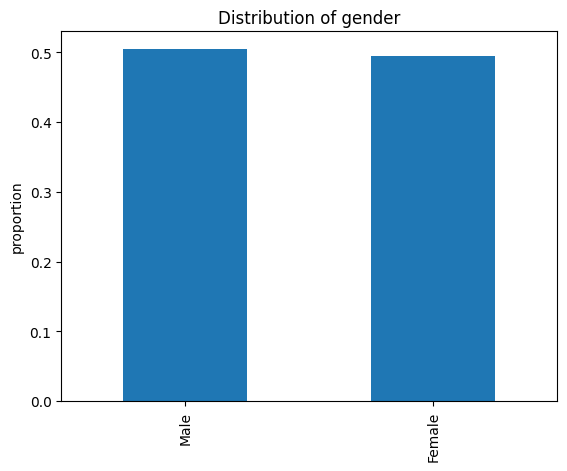

In [16]:
# Interact

interact(bar_plot, a = categorical_columns);

Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus:

*   Il y a plus de clients qui se sont désabonnés (plus de 70%) que de clients qui se sont désabonné (moins de 30%). Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire.

In [17]:
# Echantillonnement aléatoire de la variable 'TotalCharges'

df['TotalCharges'].sample(15)

6712     2289.9
1009      485.2
362     2878.55
5421      741.5
5520    4589.85
1855     936.85
853      352.65
4356         56
1753     6827.5
6829        125
5974      218.5
5141      86.05
5604       1207
2383     565.75
6412    7679.65
Name: TotalCharges, dtype: object

Apparemment c'est à cause de la présence d'espce ua niveay de la variable ***TotalCharges*** que Pandas la considère comme une variables avec des valeurs de type *object* (chaîne de caractère).
Pour resoudre ce problème, nous allons remplacer ces espaces par des NaN et transformer le type de ses valeurs en *float*

In [18]:
# Variables quantitatives

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Création d'une fonction de construction d'histogrammes et de manière interactive

def hist_plot(b):
  sns.distplot(df[b], kde=False)
  plt.title('Histogram of '+str(b))
  return plt.show()

# Conversion du type des valeurs de la variable 'TotalCharges' en float

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [19]:
# Interact
interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

In [20]:
# Coefficient d'asymétrie de la variable 'TotalCharges'

df['TotalCharges'].skew()

0.961642499724251

In [21]:
# Creation d'une fonction de construction de boîtes à moustaches et de manière interactive
def box_plot(b):
  sns.boxplot(y = df[b])
  plt.title('Boxplot of ' + str(b))
  return plt.show()

# Interact

interact(box_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

Nous pouvons conclure qu'il n'y a pas de valeurs abérrantes (outliers). Mais ces valeurs asymétriques peuvent causer des erreurs au niveau des modèles que nous allons construire. Pour cela, nous allons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.

Analyse bivariées

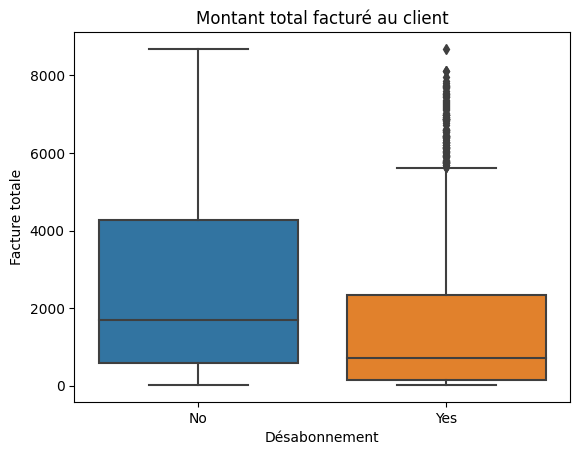

In [22]:
# TotalCharges vs Churn

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture totale')
plt.title('Montant total facturé au client')
plt.show()

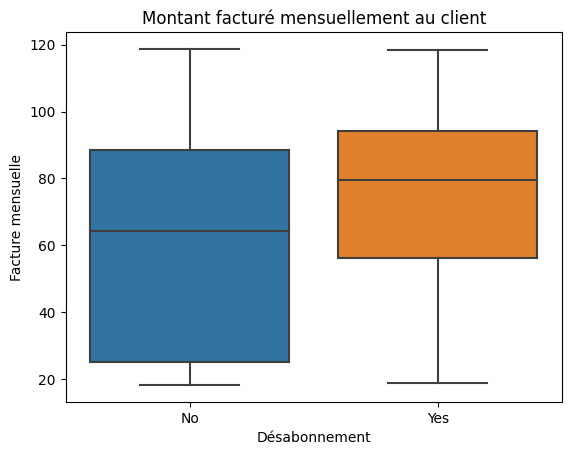

In [23]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. Mais les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui se sont désabonnées. Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut-être un facteur important qui détermine si un client va se désabonner ou non

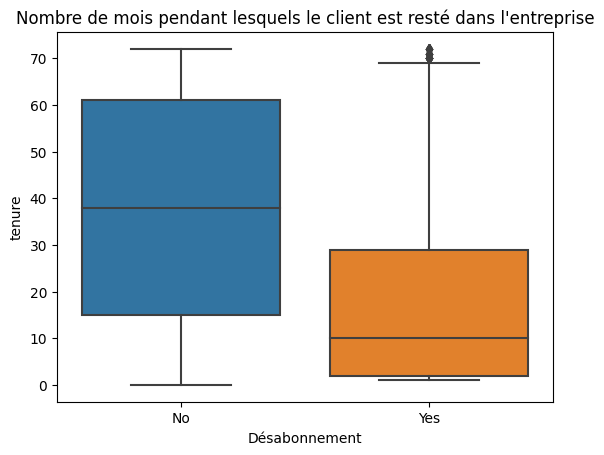

In [24]:
# Tenure vs Churn

sns.boxplot(x='Churn', y='tenure', data=df)
plt.xlabel('Désabonnement') 
plt.title("Nombre de mois pendant lesquels le client est resté dans l'entreprise")
plt.show()

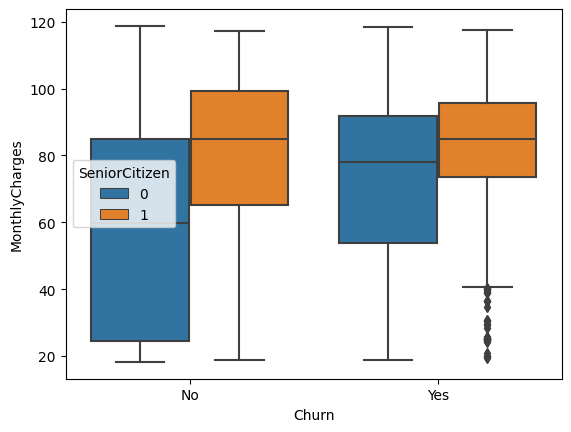

In [25]:
# MonthlyCharges vs Churn by SeniorCitizen

sns.boxplot(x ='Churn', y ='MonthlyCharges', data=df, hue = 'SeniorCitizen');

Il semble que les personnew âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgrés cela, il restent plus fidèles à l'entreprise que les jeunes.

In [26]:
# Résumé statistique

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Prétraitement des données

In [27]:
# Gestion des valeurs manquantes

data = df.copy()

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nous constatons qu'il y a 11 valeurs manquantes dans la variable *MonthlyCharges*. Nous allons supprimer ces valeurs manquantes.

In [28]:
# Suppression des valeurs manquantes

data.dropna(inplace=True)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# Encodages des variables binaires

data['gender'] = data['gender'].apply(lambda row: 1 if row == 'female' else 0)

binairy_columns = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()

binairy_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [31]:
# Nous avons trouvé les variables binaires. Maintenant nous les encodons.

for column in binairy_columns:
  data[column] = data[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [32]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
# Encodages des variables catégoricielles restantes

encoding_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()

encoding_cat_vars_dummies = pd.get_dummies(data=data[encoding_cat_vars], columns=encoding_cat_vars, drop_first=True)

In [34]:
# Nouvelle dataframe

data = pd.concat([data['gender'], data[binairy_columns], encoding_cat_vars_dummies, data[numerical_columns]], axis=1)

In [35]:
# Affichage de la nouvelle dataframe

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


Nous avons vu que la variable *TotalCharges* est très asymétriques alors transformons-la par une fonction racine carrée

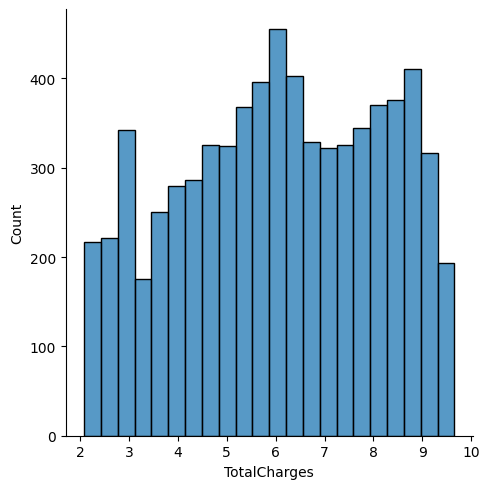

In [42]:
# Transformation de la variable 'TotalCharges'

data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Histogramme de la variables transformées

sns.displot(data['TotalCharges'], kde=False)

In [43]:
# Coefficient d'asymétrie de la variable 'TotalCharges' après transformation

data['TotalCharges'].skew()

-0.15579743559252088

In [45]:
# Données d'entraîment 60%, de validation 20% et de test 20%

X = data.drop('Churn', axis = 1)
y = data['Churn']
seed=25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contact soient les mêmes dans les différents ensembles de données.

In [46]:
# Fréquence des classes dans y
pd.DataFrame(y).value_counts(normalize = True)

Churn
0        0.734215
1        0.265785
dtype: float64

In [47]:
# Fréquence des classes dans y_train
pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.734297
1        0.265703
dtype: float64

In [48]:
# Fréquence des classes dans y_val
pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.733997
1        0.266003
dtype: float64

In [49]:
# Fréquence des classes dans y_test
pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.734186
1        0.265814
dtype: float64